<a href="https://colab.research.google.com/github/eshmaapps/DALL-E/blob/master/Resnet_raw_goldendoodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
#!pip install keras.applications
!pip install -q streamlit
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 


In [1]:
from tensorflow import keras
from keras import layers
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
!unzip golden.zip -d golden
#!unzip modelweights.zip -d modelweights
!unzip test.zip -d test

Archive:  golden.zip
   creating: golden/golden/
  inflating: golden/golden/.DS_Store  
  inflating: golden/__MACOSX/golden/._.DS_Store  
   creating: golden/golden/goldendoodle/
   creating: golden/golden/goldenretreiver/
  inflating: golden/golden/goldendoodle/47.jpeg  
  inflating: golden/__MACOSX/golden/goldendoodle/._47.jpeg  
  inflating: golden/golden/goldendoodle/Image_15.jpg  
  inflating: golden/golden/goldendoodle/Image_29.JPG  
  inflating: golden/golden/goldendoodle/10.jpeg  
  inflating: golden/__MACOSX/golden/goldendoodle/._10.jpeg  
  inflating: golden/golden/goldendoodle/Image_28.jpg  
  inflating: golden/golden/goldendoodle/Image_14.jpg  
  inflating: golden/golden/goldendoodle/Image_17.jpg.sb-1659046f-xbOfr6  
  inflating: golden/__MACOSX/golden/goldendoodle/._Image_17.jpg.sb-1659046f-xbOfr6  
  inflating: golden/golden/goldendoodle/Image_16.jpg  
  inflating: golden/golden/goldendoodle/26.jpeg  
  inflating: golden/__MACOSX/golden/goldendoodle/._26.jpeg  
  inflatin

In [3]:
# importing flower dataset
import pathlib
  
dataset_url = "/content/golden/golden/"
data_dir = pathlib.Path(dataset_url)

image_count = len(list(data_dir.glob('golden*/*.*')))
print(image_count)

dogs = list(data_dir.glob('goldendoodle/*'))


291


In [ ]:
PIL.Image.open(str(dogs[0]))

In [6]:
# Training split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32)

# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256,256),
    batch_size=32)

class_names = train_ds.class_names
print(class_names)

Found 260 files belonging to 2 classes.
Using 208 files for training.
Found 260 files belonging to 2 classes.
Using 52 files for validation.
['goldendoodle', 'goldenretreiver']


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
IMG_WIDTH = 256
IMG_HEIGHT =  256
NUM_CLASSES = 2
from tensorflow.keras.layers import Activation, Input, GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Input, GlobalAveragePooling2D, Dense, Dropout, Flatten

# Import the pretrained model without the top classification layer
base_model = ResNet50(include_top=False,
                      input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze all layers except for the last 8 layers that will be retrained
for layer in base_model.layers[:-8]:
    layer.trainable = False

custom_model = GlobalAveragePooling2D()(base_model.output)
custom_model = Dense(512, activation='relu')(custom_model)
custom_model = Dropout(0.5)(custom_model)

# Final layer : the number of neurons is equal to the number of classes we want to predict
# Since we have more than two classes, we choose 'softmax' as the activation function.
custom_model = Dense(1, activation = 'sigmoid')(custom_model)
model = Model(inputs=base_model.input, outputs=custom_model)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])
model.summary()


In [8]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)
# Save the model to Keras HDF5 format
model.save('./model-finetuned.h5', save_format='h5')
           
# Save the model to TensorFlow format (for deployment to Google AI Platform)
model.save('TFSavedModel', save_format='tf')

Epoch 1/25
7/7 [==============================] - 17s 572ms/step - loss: 0.5849 - acc: 0.8077 - val_loss: 2.5175e-04 - val_acc: 1.0000
Epoch 2/25
7/7 [==============================] - 3s 210ms/step - loss: 0.0149 - acc: 0.9952 - val_loss: 6.4462e-11 - val_acc: 1.0000
Epoch 3/25
7/7 [==============================] - 3s 211ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.0754e-10 - val_acc: 1.0000
Epoch 4/25
7/7 [==============================] - 3s 209ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 4.0575e-07 - val_acc: 1.0000
Epoch 5/25
7/7 [==============================] - 3s 209ms/step - loss: 3.9965e-04 - acc: 1.0000 - val_loss: 4.4808e-05 - val_acc: 1.0000
Epoch 6/25
7/7 [==============================] - 3s 206ms/step - loss: 8.6537e-04 - acc: 1.0000 - val_loss: 2.5226e-05 - val_acc: 1.0000
Epoch 7/25
7/7 [==============================] - 3s 208ms/step - loss: 6.4505e-04 - acc: 1.0000 - val_loss: 1.0840e-05 - val_acc: 1.0000
Epoch 8/25
7/7 [==============================] -

In [ ]:
# Load the saved model
model = load_model('./model-finetuned.h5')

In [19]:
print(class_names)

['goldendoodle', 'goldenretreiver']


7
1/1 [==============================] - 0s 28ms/step


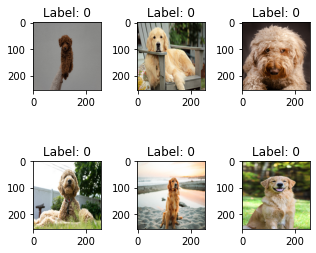

In [25]:
# Testing the model now 

from tensorflow.keras.preprocessing import image

files = list() # List of files retrieved from the directory
top_predictions = []

testset_url = "/content/test/test/"
test_dir = pathlib.Path(testset_url)

image_count = len(list(test_dir.glob('*')))
print(image_count)
files = list(test_dir.glob('*.jpg'))

#Show results
num_row = 2
num_col = 3# plot images
num = num_row*num_col

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
count = 0
# Pre-process each image and feed it to the model to get a prediction
for i in files:
    # Transform each image into a Tensor
    img = image.load_img(i, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    
    # Get predictions from the model    
    prediction = model.predict(img_preprocessed)
    # Get index of prediction with the highest probability
    top_index = np.argmax(prediction)
    top_predictions.append(class_names[top_index])

    ax = axes[count//num_col, count%num_col]
    ax.imshow(img)
    ax.set_title('Label: {}'.format(top_index))
    count = count + 1
    #

plt.tight_layout()
plt.show()

In [ ]:

num_classes = len(class_names)
  
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180,180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
!ngrok authtoken 2EuBkh4dDyaO8W08FbMuDmgU4NP_5pwyoprCYeR3eAWZzin7S

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

In [ ]:
%%writefile streamlit_app.py
import streamlit as st 

def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")
	uploaded_file = st.file_uploader("Choose a file")
  img = image.load_img(i, target_size=(IMG_HEIGHT, IMG_WIDTH))
  img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    
    # Get predictions from the model    
    prediction = model.predict(img_preprocessed)
    
    # Get index of prediction with the highest probability
    top_index = np.argmax(prediction)
    top_predictions.append(labels[top_index])
	
if __name__ == '__main__':
	main()


#!nohub streamlit run app.py &

Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py  & npx localtunnel --port 8501

2022-10-23 04:55:30.335 INFO    numexpr.utils: NumExpr defaulting to 2 threads.



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.83.145.224:8501



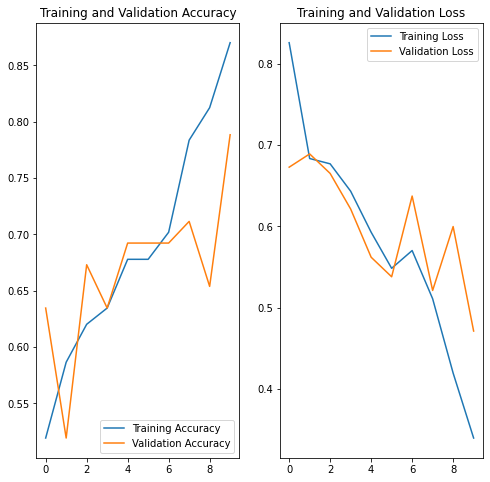

In [ ]:
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
  
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']
  
#epochs 
epochs_range = range(epochs)
  
#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
  
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()